In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True

/Users/hanboshao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  


In [21]:
data = pd.read_csv("train.csv")

In [13]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
columns = ['KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageYrBlt',
 'GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF',
 'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal','MoSold',
 'YrSold','SaleType','SaleCondition', 'SalePrice', 'GrLivArea']

In [5]:
df = data[columns]

In [6]:
df.describe()

,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,GrLivArea
count,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,1515.463699
std,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,525.480383
min,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,334.000000
25%,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,1129.500000
50%,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,1464.000000
75%,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,1776.750000
max,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,5642.000000


In [7]:
np.sum(pd.isna(df), axis = 0)

KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
GrLivArea           0
dtype: int64

In [8]:
# KitchenQual  Kitchen Quality  (we have to decide the scale though)
print(df.KitchenQual.unique())
df['KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

['Gd' 'TA' 'Ex' 'Fa']


/Users/hanboshao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


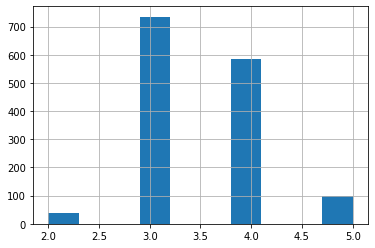

In [9]:
df.KitchenQual.hist()

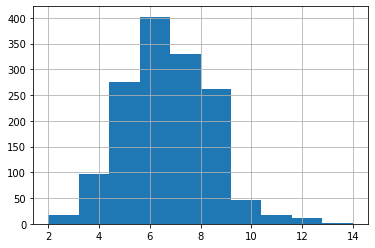

In [10]:
# TotRmsAbvGrd Total rooms above grade (does not include bathrooms) # can be treat as either numeric or categorical
sorted(df.TotRmsAbvGrd.unique())
df.TotRmsAbvGrd.hist()

In [51]:
# Functional Home functionality 
# This is also a categorical variable and scale needs to be decided 
print(df.Functional.unique())

['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


In [52]:
df['Functional'] = df['Functional'].map({'Typ': 0, 'Min1': -1, 'Min2': -2, 'Mod': -3, 'Maj1': -4,
                                        'Maj2': -5, 'Sev': -6, 'Sal': -7})

/Users/hanboshao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


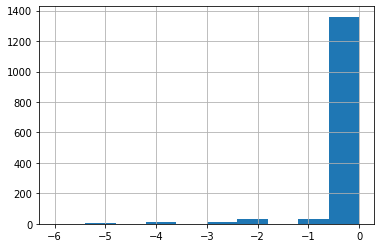

In [54]:
df.Functional.hist()

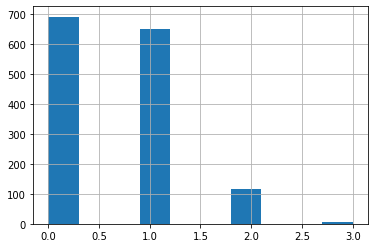

In [55]:
# Fireplaces  Number of Fireplaces
df.Fireplaces.hist()

In [56]:
# FireplaceQu  The quality of fireplace # need to deal with nan data later nan means no fireplace
print(df.FireplaceQu.unique())

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


In [57]:
df['Functional'] = df['Functional'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

/Users/hanboshao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


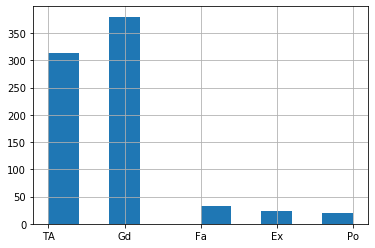

In [58]:
df.FireplaceQu.hist()

### Garage Related Variables

In [86]:
# GarageType: Garage location Categorical Variable
df.GarageType.value_counts(dropna = False)

Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

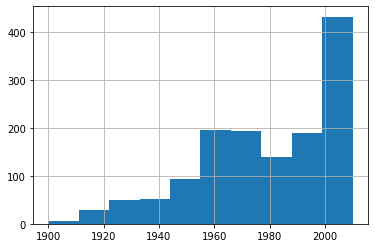

In [81]:
# GarageYrBlt: Year garage was built # year
df.GarageYrBlt.hist()

In [83]:
#GarageFinish: Interior finish of the garage # categorical #nan means no garage
df.GarageFinish.value_counts(dropna = False)

Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

In [88]:
# GarageCars: Size of garage in car capacity # More or less a categorical variable
df.GarageCars.value_counts(dropna = False)

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

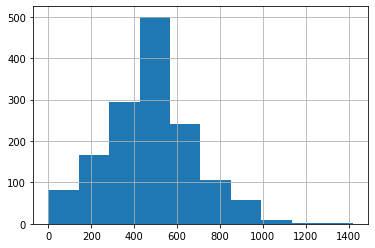

In [89]:
# GarageArea: Size of garage in square feet
df.GarageArea.hist()

In [90]:
# GarageQual: Garage quality # NA refers to no garage # categorical variable
df.GarageQual.value_counts(dropna = False)

TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

In [91]:
# GarageCond: Garage condition # Categorical variable
df.GarageCond.value_counts(dropna = False)

TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

### Other Variables

In [92]:
#PavedDrive: Paved driveway # Categorical Variable
df.PavedDrive.value_counts(dropna = False)

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

### Different Areas in Square Feet

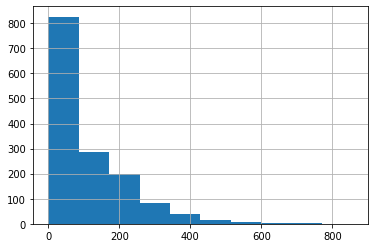

In [93]:
#WoodDeckSF: Wood deck area in square feet
df.WoodDeckSF.hist()

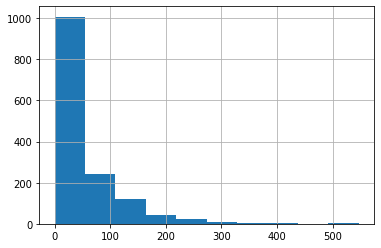

In [94]:
#OpenPorchSF: Open porch area in square feet
df.OpenPorchSF.hist()

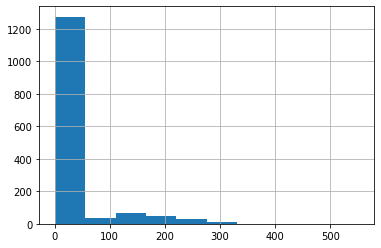

In [95]:
# EnclosedPorch: Enclosed porch area in square feet
df.EnclosedPorch.hist()

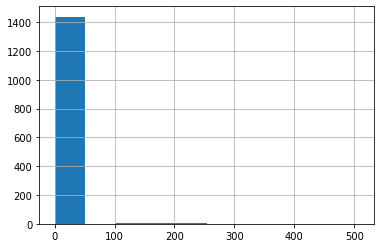

In [98]:
#3SsnPorch: Three season porch area in square feet
df['3SsnPorch'].hist()

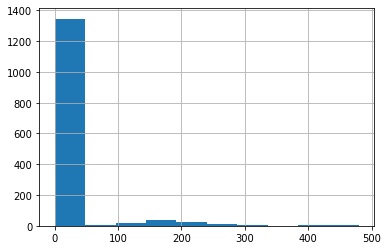

In [99]:
# ScreenPorch: Screen porch area in square feet
df.ScreenPorch.hist()

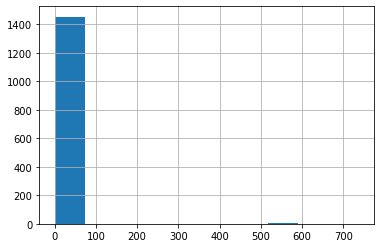

In [100]:
#PoolArea: Pool area in square feet
df.PoolArea.hist()

In [101]:
#PoolQC: Pool quality # large proportion of homes does not have pools
df.PoolQC.value_counts(dropna = False)

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [102]:
#Fence: Fence quality
df.Fence.value_counts(dropna = False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [104]:
#MiscFeature: Miscellaneous feature not covered in other categories #Nan simply means none of those feature exists
# Categorical Variable
# Miscellaneous home features
df.MiscFeature.value_counts(dropna=False)

NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [108]:
#MiscVal: $Value of miscellaneous feature # since a lot house doesn't have miscfeature, so mean is much closer to 0
df.MiscVal.describe()

count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64

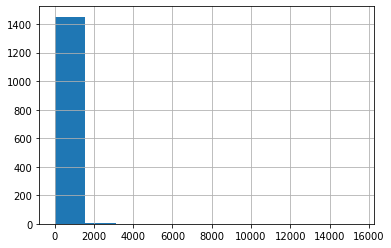

In [107]:
df.MiscVal.hist()

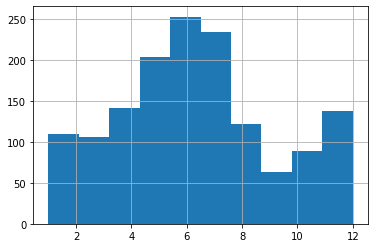

In [109]:
#MoSold: Month Sold (MM)
df.MoSold.hist()

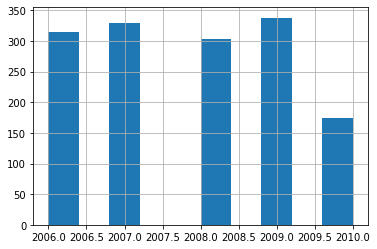

In [110]:
#YrSold: Year Sold (YYYY)
df.YrSold.hist()

In [111]:
#SaleType: Type of sale
#Categorical 
df.SaleType.value_counts(dropna = False)

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [112]:
#SaleCondition: Condition of sale
#Categorical
df.SaleCondition.value_counts(dropna=False)

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [30]:
df.groupby('SaleCondition')[['SalePrice']].mean()

,SalePrice
SaleCondition,
Abnorml,146526.623762
AdjLand,104125.000000
Alloca,167377.416667
Family,149600.000000
Normal,175202.219533
Partial,272291.752000


SaleCondition
Abnorml    AxesSubplot(0.125,0.125;0.775x0.755)
AdjLand    AxesSubplot(0.125,0.125;0.775x0.755)
Alloca     AxesSubplot(0.125,0.125;0.775x0.755)
Family     AxesSubplot(0.125,0.125;0.775x0.755)
Normal     AxesSubplot(0.125,0.125;0.775x0.755)
Partial    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

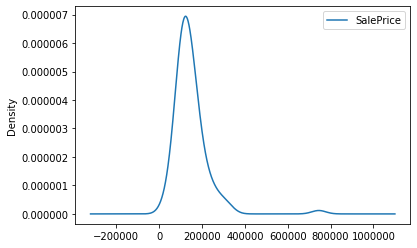

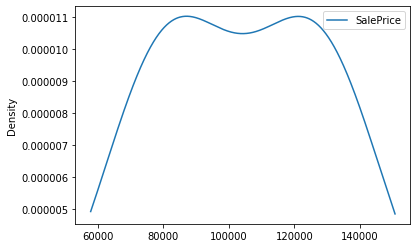

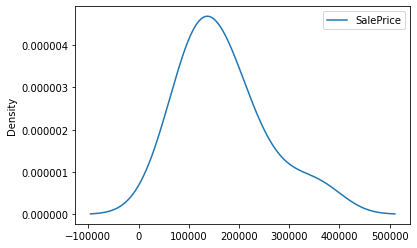

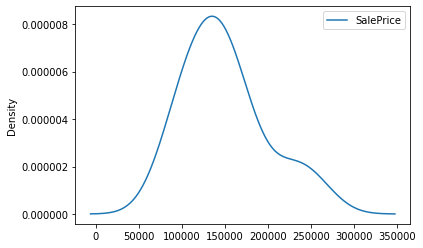

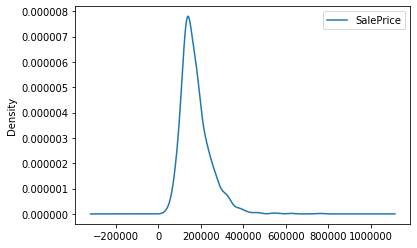

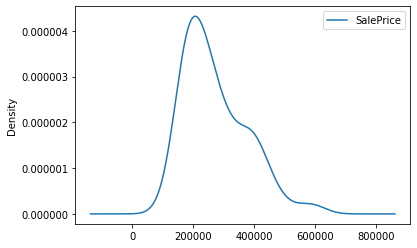

In [41]:
#fig, ax = plt.subplots(figsize=(8,6))
df.groupby('SaleCondition')[['SalePrice']].plot(kind = 'kde')

In [44]:
df1 = df[df.SaleCondition == 'Partial']

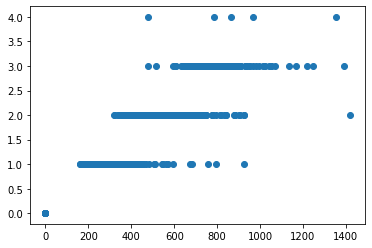

In [4]:
plt.scatter(data.GarageArea, data.GarageCars)

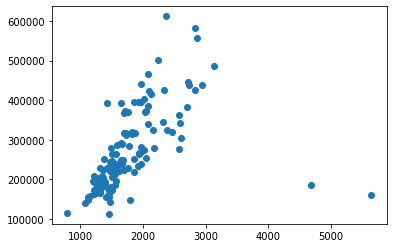

In [46]:
plt.scatter(df1.GrLivArea, df1.SalePrice)

In [47]:
df1 = df[df.SaleCondition == 'Normal']

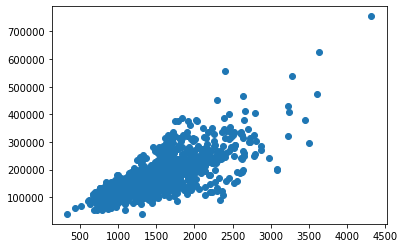

In [48]:
plt.scatter(df1.GrLivArea, df1.SalePrice)

In [6]:
df1 = df[['GrLivArea', 'SaleCondition', 'SalePrice']]

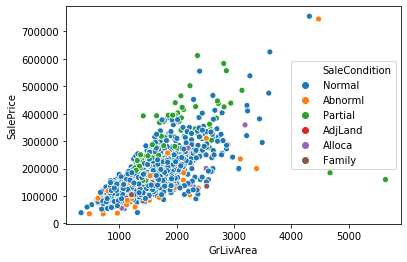

In [7]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="SaleCondition",
                     data=df1)

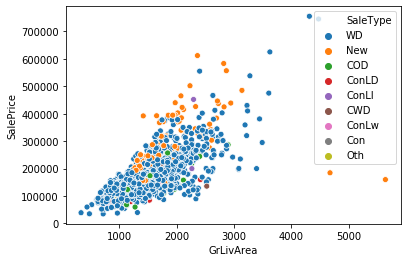

In [10]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="SaleType",
                     data=df)

In [16]:
list(data.SaleType.unique())

['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth']

In [ ]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

In [19]:
data.ExterQual

0       Gd
1       TA
2       Gd
3       TA
4       Gd
        ..
1455    TA
1456    TA
1457    Ex
1458    TA
1459    Gd
Name: ExterQual, Length: 1460, dtype: object

In [122]:
garageColumns = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
#garageColumns = ['GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
df_garage = data[garageColumns]
df_garage = df_garage.dropna(how = "any")
df_garage['GarageQual'] = df_garage['GarageQual'].map(
    {'Ex': 90, 'Gd': 80, 'TA': 70, 'Fa': 60, 'Po': 30})
df_garage['GarageCond'] = df_garage['GarageCond'].map(
    {'Ex': 90, 'Gd': 80, 'TA': 70, 'Fa': 60, 'Po': 30})

In [123]:
GaType_dummy = pd.get_dummies(df_garage['GarageType'], prefix='GaType', prefix_sep='__')
GaType_dummy = GaType_dummy.drop('GaType__2Types', axis=1)
df_garage = pd.concat([df_garage.drop('GarageType', axis=1), GaType_dummy], axis=1)
GaFin_dummy = pd.get_dummies(df_garage['GarageFinish'], prefix='GaFin', prefix_sep='__')
GaFin_dummy = GaFin_dummy.drop('GaFin__Fin', axis=1)
df_garage = pd.concat([df_garage.drop('GarageFinish', axis=1), GaFin_dummy], axis=1)
df_garage_target = df_garage['GarageCond']
df_garage = df_garage.drop('GarageCond', axis = 1)

In [124]:
df_garage

,GarageYrBlt,GarageCars,GarageArea,GarageQual,GaType__Attchd,GaType__Basment,GaType__BuiltIn,GaType__CarPort,GaType__Detchd,GaFin__RFn,GaFin__Unf
0,2003.0,2,548,70,1,0,0,0,0,1,0
1,1976.0,2,460,70,1,0,0,0,0,1,0
2,2001.0,2,608,70,1,0,0,0,0,1,0
3,1998.0,3,642,70,0,0,0,0,1,0,1
4,2000.0,3,836,70,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1455,1999.0,2,460,70,1,0,0,0,0,1,0
1456,1978.0,2,500,70,1,0,0,0,0,0,1
1457,1941.0,1,252,70,1,0,0,0,0,1,0
1458,1950.0,1,240,70,1,0,0,0,0,0,1


In [125]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(df_garage)
ols = sm.OLS(df_garage_target, X_add_const)
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:             GarageCond   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     108.3
Date:                Sat, 22 Feb 2020   Prob (F-statistic):          3.37e-177
Time:                        13:39:59   Log-Likelihood:                -3224.1
No. Observations:                1379   AIC:                             6472.
Df Residuals:                    1367   BIC:                             6535.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.3843      7.458     

In [126]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [127]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [224]:
columns = ['LotArea', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
    'MasVnrArea', 'ExterQual', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea',
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'MoSold',
    'YrSold', 'SalePrice']
df_model = data[columns]
df_target = df_model[['SalePrice']]
df_features = df_model.drop('SalePrice', axis = 1)

In [225]:
HS_dummy = pd.get_dummies(df_features['HouseStyle'], prefix='HS', prefix_sep='__', drop_first = True)
df_features = pd.concat([df_features.drop('HouseStyle', axis=1), HS_dummy], axis=1)
EQ_dummy = pd.get_dummies(df_features['ExterQual'], prefix='EQ', prefix_sep='__', drop_first = True)
df_features = pd.concat([df_features.drop('ExterQual', axis=1), EQ_dummy], axis=1)
HQC_dummy = pd.get_dummies(df_features['HeatingQC'], prefix='HQC', prefix_sep='__',drop_first = True)
df_features = pd.concat([df_features.drop('HeatingQC', axis=1), HQC_dummy], axis=1)
KQ_dummy = pd.get_dummies(df_features['KitchenQual'], prefix='KQ', prefix_sep='__',drop_first = True)
df_features = pd.concat([df_features.drop('KitchenQual', axis=1), KQ_dummy], axis=1)

In [226]:
df_features.fillna(0, inplace = True)

In [247]:
df_features.to_csv('df_regularized_reg.csv')

In [219]:
ridge = Ridge()

In [220]:
df_target.shape

(1460, 1)

In [221]:
alphas = np.arange(0,20)
ridge.set_params(normalize=True)
coefs  = []
scores = []
for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(df_features, df_target)  
        coefs.append(ridge.coef_)
        scores.append(ridge.score(df_features, df_target))

In [222]:
for i in range(len(coefs)):
    coefs[i] = coefs[i].flatten()

In [223]:
coefs = pd.DataFrame(coefs, index = alphas, columns = df_features.columns)  
pd.set_option('display.max_columns', None)
coefs

,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,HS__1.5Unf,HS__1Story,HS__2.5Fin,HS__2.5Unf,HS__2Story,HS__SFoyer,HS__SLvl,EQ__Fa,EQ__Gd,EQ__TA,HQC__Fa,HQC__Gd,HQC__Po,HQC__TA,KQ__Fa,KQ__Gd,KQ__TA
0,0.576270,13946.785787,6038.700254,346.398064,23.023297,6.399742,51.668766,1809.816809,4851.945181,-3903.988377,2027.078827,6951.481757,32.509616,30.408959,-5.274305,-33.615761,-846.789656,11330.254785,12953.763250,-20467.582192,-16540.491115,-5080.553318,10737.572746,4109.711891,-31796.432085,-27037.278624,-35642.314098,-744.828467,-4951.555780,-13809.198013,-7179.415682,-35020.036948,-36806.087486,-40877.728222
1,0.412987,8563.127466,2019.682506,179.324537,33.403476,19.491522,18.252699,8266.002853,5128.568831,-870.416894,3781.725756,9370.129854,36.068543,31.011140,33.558563,90.935188,-215.714396,-2823.616951,1981.310047,2411.826871,-7142.054482,723.841915,162.762484,-759.554547,-12553.992015,2621.839632,-12112.366544,-5983.116674,-4518.902809,-9533.668559,-7288.740258,-8498.342372,-2943.581716,-11179.226609
2,0.337699,6671.877926,926.888950,154.866963,28.721560,16.390033,14.624406,7982.048107,4503.700801,199.014079,3223.306968,8072.134299,30.739930,26.930623,35.441661,100.557738,-170.582281,-4393.417759,943.163224,3617.670673,-4679.083883,1756.482020,-1670.230271,-922.344366,-11408.195741,4566.537663,-10480.109141,-5919.280167,-3745.539451,-8591.506383,-6224.943161,-8082.434204,464.437625,-9222.466769
3,0.286935,5624.246688,464.434074,138.485708,25.012130,14.099398,12.543507,7443.623693,4086.156012,579.799408,2838.249489,7025.728405,26.834140,23.685759,33.924408,100.837175,-152.597694,-4799.522355,465.562748,3657.024063,-3619.961268,2132.188683,-2323.939474,-956.988240,-10265.857433,5021.111333,-9414.654998,-5545.725709,-3259.313720,-8002.857889,-5518.174271,-7521.417425,1669.700507,-8164.756275
4,0.250086,4913.699612,226.480516,125.636490,22.167351,12.396115,11.079044,6902.146963,3752.839473,735.732325,2544.844610,6220.209999,23.870203,21.143040,31.806493,97.733355,-140.238490,-4819.921187,199.435826,3475.760255,-3009.894205,2263.008141,-2559.427919,-948.091796,-9282.924468,5048.020772,-8574.750590,-5143.789131,-2902.747613,-7478.483628,-4983.160001,-6951.158276,2178.735551,-7390.331620
5,0.221994,4384.678283,90.312656,115.072655,19.925973,11.078717,9.959698,6406.743661,3471.925292,798.172301,2310.332536,5585.354644,21.531055,19.105430,29.691695,93.443360,-130.153843,-4693.785823,38.262384,3253.324443,-2602.315144,2283.901251,-2617.833842,-920.997626,-8456.537697,4919.529566,-7878.549675,-4770.193686,-2623.432386,-6997.879681,-4553.015635,-6428.459990,2395.345646,-6769.046280
6,0.199797,3969.257675,7.114569,106.179951,18.112015,10.026097,9.064231,5964.963957,3229.894430,816.639675,2117.296872,5071.979793,19.629562,17.435425,27.735117,88.857049,-121.475828,-4511.969883,-64.159398,3035.992056,-2305.285425,2251.894001,-2594.582243,-886.476017,-7759.756695,4732.696938,-7288.118955,-4435.777043,-2396.367190,-6560.828726,-4195.618574,-5964.037706,2471.692324,-6250.752843
7,0.181772,3631.535106,-45.923234,98.574280,16.611155,9.163443,8.326309,5573.510078,3018.751102,813.024307,1955.059978,4647.708644,18.048686,16.040374,25.968266,84.348869,-113.857874,-4312.921247,-131.209364,2836.228418,-2076.376123,2194.114227,-2532.591404,-849.581227,-7166.901235,4527.628787,-6780.016298,-4139.465525,-2207.163620,-6165.875968,-3892.320249,-5554.755357,2475.835887,-5808.800402
8,0.166820,3350.137997,-80.664193,91.989288,15.346860,8.442169,7.705142,5226.470383,2832.896905,798.025258,1816.517085,4290.749167,16.710962,14.856426,24.384560,80.073304,-107.102972,-4113.787526,-175.861561,2656.289422,-1893.041276,2124.393697,-2452.792741,-812.770562,-6657.329356,4322.084245,-6337.868865,-3877.130309,-2046.616020,-5809.806810,-3630.977214,-5193.989066,2441.562643,-5426.329440
9,0.154200,3111.281006,-103.772110,86.230224,14.266030,7

Text(0, 0.5, 'slope values')

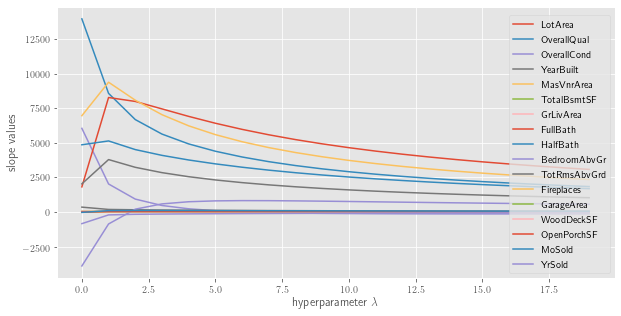

In [205]:
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.columns[:17]:
    plt.plot(coefs.index, coefs[name], label=name)
plt.legend(loc=4)   
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

In [227]:
lasso  = Lasso()
alphas = np.linspace(0.01,100,20)
lasso.set_params(normalize=True)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(df_features, df_target)  
        coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = df_features.columns)  
pd.set_option('display.max_columns', None)
coefs_lasso

,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,HS__1.5Unf,HS__1Story,HS__2.5Fin,HS__2.5Unf,HS__2Story,HS__SFoyer,HS__SLvl,EQ__Fa,EQ__Gd,EQ__TA,HQC__Fa,HQC__Gd,HQC__Po,HQC__TA,KQ__Fa,KQ__Gd,KQ__TA
0.010000,0.576240,13947.642838,6038.336950,346.417558,23.025672,6.402564,51.666502,1808.036304,4848.998100,-3903.480328,2026.922807,6951.571212,32.510861,30.407882,-5.261551,-33.467384,-846.275268,11321.125603,12949.682110,-20460.368737,-16537.165049,-5079.726167,10731.430723,4104.684828,-31781.862607,-27025.521983,-35630.086427,-742.196581,-4949.499936,-13788.215113,-7177.974574,-35014.282485,-36802.554199,-40873.969721
5.272632,0.560467,14405.130317,5830.273665,355.366941,24.205630,7.885680,50.510394,890.322768,3317.954765,-3631.269670,1934.970637,7007.926568,33.175094,29.818489,-0.000000,-0.000000,-592.604167,6529.945872,10850.124815,-16603.977870,-14613.376219,-4593.589912,7529.834246,1527.333693,-24289.806406,-21009.446192,-29352.052133,-0.000000,-3944.200450,-2595.030339,-6503.961449,-31881.324671,-34883.327781,-38842.151875
10.535263,0.545431,14864.870002,5599.454527,360.339012,25.151313,9.446713,49.538713,47.521439,1915.420927,-3373.543201,1822.213287,7038.706573,33.843462,29.055741,0.000000,-0.000000,-363.281997,2670.996359,9185.438405,-12375.733248,-12016.602238,-3698.008433,4759.009802,0.000000,-17181.396163,-15265.698951,-23398.190767,-0.000000,-3099.828116,-0.000000,-5985.680909,-28684.224251,-32900.714261,-36753.833380
15.797895,0.530737,15299.762385,5359.319647,355.646698,26.019957,11.103440,48.288736,0.000000,883.738639,-3159.608296,1677.866560,7045.612475,34.450083,28.282107,0.000000,-0.000000,-137.878594,0.000000,8142.117353,-7854.638882,-9293.653569,-2424.421264,2780.798484,0.000000,-10179.491156,-9637.575103,-17607.946189,-0.000000,-2327.451319,-0.000000,-5504.119562,-25584.121453,-30958.633241,-34658.096188
21.060526,0.516140,15717.893800,5132.001291,351.268573,26.894422,12.670388,47.139607,0.000000,0.000000,-2928.941441,1534.803250,7033.897489,35.068076,27.607907,0.000000,-0.000000,-0.000000,0.000000,7339.065155,-3390.506802,-6473.113118,-1121.285707,1059.595829,0.000000,-2932.634884,-3914.902960,-11738.123533,-0.000000,-1556.330039,-0.000000,-4998.668124,-22574.578511,-29084.774817,-32604.253763
26.323158,0.502434,16079.453062,4863.706244,340.744860,27.384586,14.144794,45.954433,0.000000,0.000000,-2631.083709,1374.409907,6975.602702,35.698851,26.999325,0.000000,-0.000000,-0.000000,0.000000,6795.019632,-0.000000,-3874.458369,-192.591946,0.000000,0.000000,-0.000000,-0.000000,-7961.574987,-0.000000,-875.686607,-0.000000,-4532.381220,-18659.312727,-26590.998227,-29965.209362
31.585789,0.486745,16420.767034,4566.644300,331.109537,27.133624,15.062487,45.377999,0.000000,0.000000,-2184.948920,1143.345151,6926.192623,36.220993,26.379176,0.000000,-0.000000,-0.000000,0.000000,6149.742422,-0.000000,-2177.202677,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-8012.968783,-0.000000,-283.250174,-0.000000,-4116.269428,-13795.896563,-22776.156109,-26179.437935
36.848421,0.470987,16763.077468,4271.594151,321.570423,26.905981,15.917587,44.851803,0.000000,0.000000,-1729.872137,910.449900,6869.895269,36.740228,25.785669,0.000000,-0.000000,-0.000000,0.000000,5416.714132,-0.000000,-582.631257,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-8030.541555,-0.000000,-0.000000,-0.000000,-3809.923423,-8919.474347,-18946.573146,-22368.518953
42.111053,0.455161,17117.502841,3974.503864,310.686898,26.663384,16.772453,44.309293,0.000000,0.000000,-1279.214251,683.310445,6814.069434,37.258882,25.203343,0.000000,-0.000000,-0.000000,0.000000,4669.803677,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-8014.010103,-0.000000,-0.000000,-0.000000,-3609.428686,-4008.987835,-15081.718610,-18504.044508
47.373684,0.439360,17452.394497,3657.000355,298.507331,26.409218,17.597616,43.767613,0.000000,0.000000

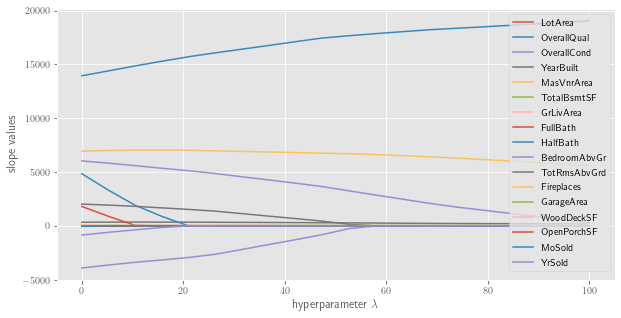

In [228]:
for name in coefs_lasso.columns[:17]:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1) 

In [229]:
columns_lasso = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt','MasVnrArea','TotalBsmtSF',
                'GrLivArea', 'Fireplaces', 'WoodDeckSF', 'GarageArea', 'EQ__TA', 'HQC__TA', 'KQ__TA']

In [231]:
df_lasso = df_features[columns_lasso]

In [232]:
df_lasso.dropna(0)

,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,TotalBsmtSF,GrLivArea,Fireplaces,WoodDeckSF,GarageArea,EQ__TA,HQC__TA,KQ__TA
0,8450,7,5,2003,196.0,856,1710,0,0,548,0,0,0
1,9600,6,8,1976,0.0,1262,1262,1,298,460,1,0,1
2,11250,7,5,2001,162.0,920,1786,1,0,608,0,0,0
3,9550,7,5,1915,0.0,756,1717,1,0,642,1,0,0
4,14260,8,5,2000,350.0,1145,2198,1,192,836,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,0.0,953,1647,1,0,460,1,0,1
1456,13175,6,6,1978,119.0,1542,2073,2,349,500,1,1,1
1457,9042,7,9,1941,0.0,1152,2340,2,0,252,0,0,0
1458,9717,5,6,1950,0.0,1078,1078,0,366,240,1,0,0


In [233]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(df_lasso)
ols = sm.OLS(df_target, X_add_const)
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     428.4
Date:                Sat, 22 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:39:08   Log-Likelihood:                -17391.
No. Observations:                1460   AIC:                         3.481e+04
Df Residuals:                    1446   BIC:                         3.488e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.307e+05   9.56e+04     -7.642      

/Users/hanboshao/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [243]:
from sklearn.model_selection import train_test_split
#np.random.seed(100)  # changing the random seed can produce different scenarios which lead to exceptions
X_train, X_test, Y_train, Y_test = train_test_split(df_features,df_target,test_size=0.2)

In [244]:
ridge.set_params(normalize=True)
lasso.set_params(normalize=True)
ridge_scores_train = []
lasso_scores_train = []
ridge_scores_test  = []
lasso_scores_test  = []

alphas = np.linspace(0.01, 1000, 100)

for alpha in alphas:
            ridge.set_params(alpha=alpha)
            lasso.set_params(alpha=alpha)
            ridge.fit(X_train, Y_train)
            lasso.fit(X_train, Y_train)
            ridge_scores_train.append(ridge.score(X_train, Y_train))
            ridge_scores_test.append(ridge.score(X_test, Y_test))
            lasso_scores_train.append(lasso.score(X_train, Y_train))
            lasso_scores_test.append(lasso.score(X_test, Y_test))
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

Text(0, 0.5, '$R^2$')

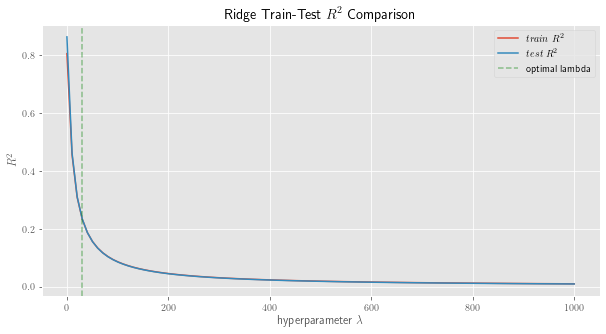

In [245]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge Train-Test $R^2$ Comparison')
ridge_underfit = ridge_scores_train < ridge_scores_test
last_underfit  = np.max(alphas[ridge_underfit])
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

Text(0, 0.5, '$R^2$')

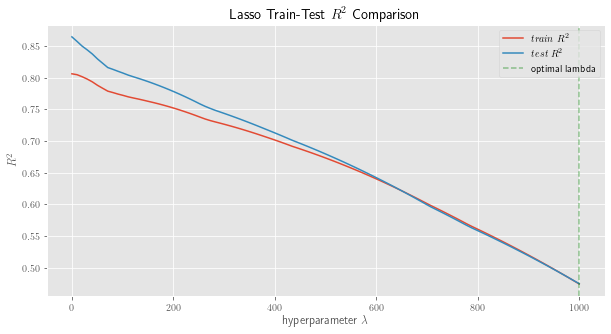

In [246]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
lasso_underfit = lasso_scores_train < lasso_scores_test
last_underfit  = np.max(alphas[lasso_underfit])
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')